## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/mouse_metadata.csv"
study_results_path = "../Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#GoodReadsSummary
mouse_count = len(combined_study_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#check for duplicates that have the same Mouse ID and Timepoint
#ReadingWritingCSV

#checks for rows value counts based on mouse id
combined_study_df["Mouse ID"].value_counts()

g989    13
c559    10
x401    10
e476    10
a897    10
        ..
u153     1
h428     1
b447     1
o848     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#checking extra data values from sample mouse (portland_crimedata)
row_info = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
row_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse = combined_study_df.loc[(combined_study_df["Mouse ID"] != "g989")]
cleaned_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_check = cleaned_mouse["Mouse ID"].value_counts()
print(clean_check)

q787    10
v991    10
a251    10
x401    10
e476    10
        ..
u153     1
h428     1
b447     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64


<h2>Timepoint Charts</h2>

In [7]:
#mouse id's with 10 timepoints
mouse_count = cleaned_mouse.groupby(["Mouse ID"]).count()
ten_count = mouse_count.loc[(mouse_count["Timepoint"]== 10)]
ten_count.reset_index(inplace=True)
mouse_list = ten_count["Mouse ID"].to_list()
mouse_df = pd.DataFrame({"Mouse ID": mouse_list})
mouse_df

,Mouse ID
0,a203
1,a251
2,a262
3,a275
4,a401
...,...
125,y865
126,z578
127,z581
128,z795


<h5> Of the 249 mice used to conduct the study, measurements at each of the 10 recorded timepoints were attained for 130. </h5>

In [8]:
#dataframe of ten timepoints for each mouse ID
merge_tp_df = pd.merge(mouse_df, cleaned_mouse, on=["Mouse ID"], how="left")
merge_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1295,z969,Naftisol,Male,9,30,25,63.145652,2
1296,z969,Naftisol,Male,9,30,30,65.841013,3
1297,z969,Naftisol,Male,9,30,35,69.176246,4
1298,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#mean to attain average tumor volume at each timepoint for each drug regimen
two_groups = merge_tp_df.groupby(['Drug Regimen', 'Timepoint'])
two_groups_df = two_groups.mean()
two_groups_df.reset_index(inplace=True)
two_groups_df

,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,12.809524,19.857143,45.000000,0.000000
1,Capomulin,5,12.809524,19.857143,44.638812,0.190476
2,Capomulin,10,12.809524,19.857143,43.288693,0.380952
3,Capomulin,15,12.809524,19.857143,42.241369,0.428571
4,Capomulin,20,12.809524,19.857143,41.046149,0.714286
...,...,...,...,...,...,...
95,Zoniferol,25,13.071429,27.571429,55.315109,1.785714
96,Zoniferol,30,13.071429,27.571429,57.520661,2.000000
97,Zoniferol,35,13.071429,27.571429,60.089372,2.285714
98,Zoniferol,40,13.071429,27.571429,62.916692,2.785714


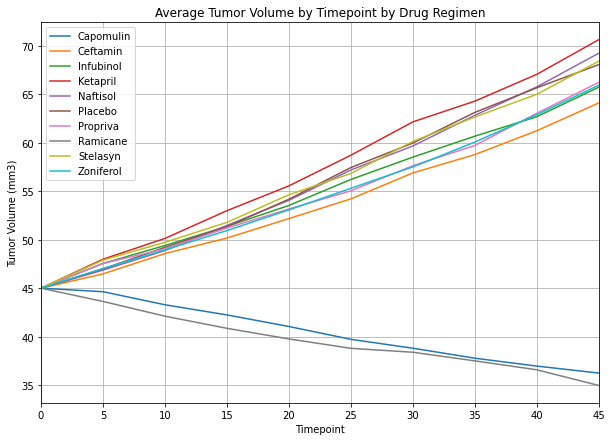

In [10]:
#sorting dataframe for each drug regimen to attain plot points
capomulin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Capomulin"]
ceftamin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ceftamin"]
infubinol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Infubinol"]
ketapril = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ketapril"]
naftisol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Naftisol"]
placebo = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Placebo"]
propriva = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Propriva"]
ramicane = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ramicane"]
stelasyn = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Stelasyn"]
zoniferol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Zoniferol"]

# Setting plot points(x,y) and label for each Drug Regimen
plt.figure(figsize=(10,7))
capomulin_x = capomulin["Timepoint"]
capomulin_y = capomulin["Tumor Volume (mm3)"]
plt.plot(capomulin_x, capomulin_y, label = "Capomulin")

ceftamin_x = ceftamin["Timepoint"]
ceftamin_y = ceftamin["Tumor Volume (mm3)"]
plt.plot(ceftamin_x, ceftamin_y, label = "Ceftamin")

infubinol_x = infubinol["Timepoint"]
infubinol_y = infubinol["Tumor Volume (mm3)"]
plt.plot(infubinol_x, infubinol_y, label = "Infubinol")

ketapril_x = ketapril["Timepoint"]
ketapril_y = ketapril["Tumor Volume (mm3)"]
plt.plot(ketapril_x, ketapril_y, label = "Ketapril")

naftisol_x = naftisol["Timepoint"]
naftisol_y = naftisol["Tumor Volume (mm3)"]
plt.plot(naftisol_x, naftisol_y, label = "Naftisol")

placebo_x = placebo["Timepoint"]
placebo_y = placebo["Tumor Volume (mm3)"]
plt.plot(placebo_x, placebo_y, label = "Placebo")

propriva_x = propriva["Timepoint"]
propriva_y = propriva["Tumor Volume (mm3)"]
plt.plot(propriva_x, propriva_y, label = "Propriva")

ramicane_x = ramicane["Timepoint"]
ramicane_y= ramicane["Tumor Volume (mm3)"]
plt.plot(ramicane_x, ramicane_y, label = "Ramicane")

stelasyn_x = stelasyn["Timepoint"]
stelasyn_y= stelasyn["Tumor Volume (mm3)"]
plt.plot(stelasyn_x, stelasyn_y, label = "Stelasyn")

zoniferol_x = zoniferol["Timepoint"]
zoniferol_y = zoniferol["Tumor Volume (mm3)"]
plt.plot(zoniferol_x, zoniferol_y, label = "Zoniferol")

#Plot Labels
plt.xlabel('Timepoint')
# Set the y axis label of the current axis.
plt.ylabel('Tumor Volume (mm3)')
# Set a title of the current axes.
plt.title('Average Tumor Volume by Timepoint by Drug Regimen')
# show a legend on the plot
plt.legend()
plt.xlim(0,45)
# Display a figure.
plt.grid()

<h5>Prescribed drug regimen on mouse tumor volume has shown effectiveness in treatments of Capomulin and Ramicane, as displayed here with an overall consecutive decrease in tumor size at each measured timepoint.</h5>